In [ ]:
!pip install avalanche-lib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.2/134.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.9/971.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.2/585.2 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.6 MB/s eta 0:00:00
 

In [ ]:
pip install pytorchcv==0.0.67

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: pytorchcv
    Found existing installation: pytorchcv 0.0.71
    Uninstalling pytorchcv-0.0.71:
      Successfully uninstalled pytorchcv-0.0.71


In [ ]:
import torch
from torch.optim import SGD
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from avalanche.benchmarks.classic import SplitMNIST, PermutedMNIST, SplitCIFAR10, SplitCUB200
from avalanche.benchmarks.datasets import CocoCaptions, PhotoTour, CIFAR10, CUB200
#from torchvision.datasets import CocoCaptions, PhotoTour
from avalanche.benchmarks import nc_benchmark, ni_benchmark
from avalanche.evaluation.metrics import bwt_metrics, accuracy_metrics, loss_metrics, timing_metrics, confusion_matrix_metrics
from avalanche.training.plugins import EvaluationPlugin
from avalanche.logging import InteractiveLogger
from avalanche.models import SimpleMLP
from avalanche.training import LwF
import matplotlib.pyplot as plt

from avalanche.benchmarks.scenarios.supervised import class_incremental_benchmark
from avalanche.benchmarks.scenarios.task_aware import task_incremental_benchmark

In [ ]:
benchmark = SplitMNIST(n_experiences=5, return_task_id=False)

train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

model = SimpleMLP()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)

EntropiaCruzada = torch.nn.CrossEntropyLoss()
cl_strategy = LwF(
    model,
    optimizer,
    EntropiaCruzada,
    alpha = 0.5,#lambda en la memoria
    temperature = 2.0,
    train_mb_size = 32,
    train_epochs = 4,
    eval_mb_size = 32
)

for experience in train_stream:
    print("Current experience: {}".format(experience.current_experience))
    cl_strategy.train(experience)
    print("Evaluating on the test set:")
    cl_strategy.eval(test_stream)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 140095938.36it/s]

Extracting /root/.avalanche/data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 27612421.66it/s]

Extracting /root/.avalanche/data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 41795692.22it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11114660.89it/s]

Extracting /root/.avalanche/data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw




/usr/local/lib/python3.10/dist-packages/avalanche/training/templates/base.py:468: PositionalArgumentsDeprecatedWarning: Avalanche is transitioning to strategy constructors that accept named (keyword) arguments only. This is done to ensure that there is no confusion regarding the meaning of each argument (strategies can have many arguments). Your are passing 3 positional arguments to the LwF.__init__ method. Consider passing them as names arguments. The ability to pass positional arguments will be removed in the future.
  warnings.warn(error_str, category=PositionalArgumentsDeprecatedWarning)


Current experience: 0
-- >> Start of training phase << --
100%|██████████| 381/381 [00:05<00:00, 68.97it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1080
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9773
100%|██████████| 381/381 [00:06<00:00, 56.05it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0140
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9966
100%|██████████| 381/381 [00:05<00:00, 68.32it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0102
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9975
100%|██████████| 381/381 [00:06<00:00, 59.39it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0085
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9980
-- >> End of training phase << --
Evaluating on the test set:
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 63/63 [00:01<00:00, 60.68it/s]
> Eval on experience 0 (Task 0

In [ ]:
benchmark = PermutedMNIST(n_experiences=5, return_task_id=False)

train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

model = SimpleMLP()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)

interactive_logger = InteractiveLogger()

evaluation = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    loss_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    bwt_metrics(experience=True, stream=True),
    timing_metrics(epoch=True, epoch_running=True),
    confusion_matrix_metrics(num_classes=10, save_image=False, stream=True),
    loggers=[interactive_logger]
)

EntropiaCruzada = torch.nn.CrossEntropyLoss()
cl_strategy = LwF(
    model,
    optimizer,
    EntropiaCruzada,
    alpha = 0.5,#lambda en la memoria
    temperature = 2.0,
    train_mb_size = 32,
    train_epochs = 4,
    eval_mb_size = 32,
    evaluator = evaluation
)

for experience in train_stream:
    print("Current experience: {}".format(experience.current_experience))
    cl_strategy.train(experience)
    print("Evaluating on the test set:")
    cl_strategy.eval(test_stream)

Current experience: 0
-- >> Start of training phase << --
100%|██████████| 1875/1875 [00:41<00:00, 45.12it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4853
	Loss_MB/train_phase/train_stream/Task000 = 0.3728
	RunningTime_Epoch/train_phase/train_stream/Task000 = 0.0005
	Time_Epoch/train_phase/train_stream/Task000 = 41.5444
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8601
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8438
100%|██████████| 1875/1875 [00:39<00:00, 47.75it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2590
	Loss_MB/train_phase/train_stream/Task000 = 0.2277
	RunningTime_Epoch/train_phase/train_stream/Task000 = 0.0003
	Time_Epoch/train_phase/train_stream/Task000 = 39.2529
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9242
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.9062
100%|██████████| 1875/1875 [00:41<00:00, 45.61it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2029
	Loss_MB/train_phas

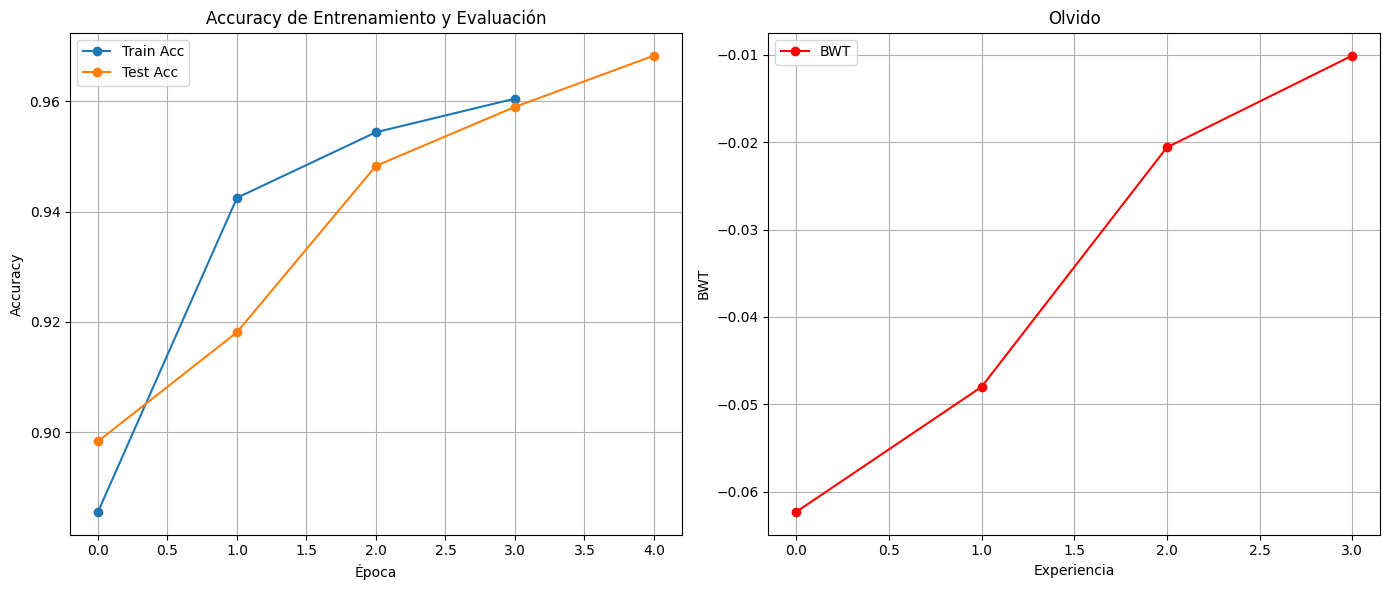

In [ ]:
epochs = [0, 1, 2, 3]
experiences = [0, 1, 2, 3, 4]

train_accuracies = [
    0.8855,
    0.9425,
    0.9544,
    0.9605
]

eval_accuracies = [
    0.8983,
    0.9181,
    0.9483,
    0.9590,
    0.9683
]

# Olvido
forgetting = [
    -0.0623,
    -0.0480,
    -0.0206,
    -0.0101,
]

#Accuracy de entrenamiento y evaluación
plt.figure(figsize=(14, 6))

#Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Acc', marker='o')
plt.plot(experiences, eval_accuracies, label='Test Acc', marker='o')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy de Entrenamiento y Evaluación')
plt.legend()
plt.grid()

#Olvido
plt.subplot(1, 2, 2)
plt.plot(experiences[:-1], forgetting, label='BWT', marker='o', color='red')
plt.xlabel('Experiencia')
plt.ylabel('BWT')
plt.title('Olvido')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
import torchvision.models as models
model = models.squeezenet1_1(pretrained=True)
model.classifier[1] = torch.nn.Conv2d(512, 10, kernel_size=(1,1))  #Ajuste para 10 clases


benchmark = SplitCIFAR10(n_experiences=5, seed=1, return_task_id=False)

train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
EntropiaCruzada = nn.CrossEntropyLoss()

interactive_logger = InteractiveLogger()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    bwt_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

cl_strategy = LwF(
    model=model,
    optimizer=optimizer,
    criterion=EntropiaCruzada,
    alpha=0.5,  # Lambda en la memoria
    temperature=2.0,
    train_mb_size=32,
    train_epochs=4,
    eval_mb_size=32,
    plugins=[evaluation_plugin]
)

for experience in train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    cl_strategy.train(experience)
    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(test_stream)
    print(f"Evaluación de la experiencia {experience.current_experience} completada")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


100%|██████████| 170498071/170498071 [00:10<00:00, 16054271.72it/s]


Extracting /root/.avalanche/data/cifar10/cifar-10-python.tar.gz to /root/.avalanche/data/cifar10
Files already downloaded and verified
Entrenando en la experiencia 0
-- >> Start of training phase << --
-- >> Start of training phase << --
100%|██████████| 313/313 [00:33<00:00,  9.40it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7043
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8125
100%|██████████| 313/313 [00:33<00:00,  9.40it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7046
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7043
100%|██████████| 313/313 [00:30<00:00, 10.10it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8618
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.9375
100%|██████████| 313/313 [00:30<00:00, 10.10it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3630
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8618
100%|██████████| 313/313 [00:31<00:00,  9.81it/s]
Ep

In [ ]:
benchmark = SplitCIFAR10(n_experiences=5, seed=1, return_task_id=False)

train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        self.fc = nn.Linear(64 * 8 * 8, num_classes)

    def forward(self, x):
        x = self.cnn(x)
        return self.fc(x)

model = SimpleCNN(num_classes=benchmark.n_classes)

optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
EntropiaCruzada = nn.CrossEntropyLoss()

interactive_logger = InteractiveLogger()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

cl_strategy = LwF(
    model=model,
    optimizer=optimizer,
    criterion=EntropiaCruzada,
    alpha=0.5,  # Lambda en la memoria
    temperature=2.0,
    train_mb_size=32,
    train_epochs=4,
    eval_mb_size=32,
    plugins=[evaluation_plugin]
)

for experience in train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    cl_strategy.train(experience)
    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(test_stream)
    print(f"Evaluación de la experiencia {experience.current_experience} completada")

Files already downloaded and verified
Files already downloaded and verified
Entrenando en la experiencia 0
-- >> Start of training phase << --
-- >> Start of training phase << --
100%|██████████| 313/313 [00:26<00:00, 12.00it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7486
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.7500
100%|██████████| 313/313 [00:26<00:00, 12.00it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5190
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7486
100%|██████████| 313/313 [00:27<00:00, 11.45it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8316
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.6875
100%|██████████| 313/313 [00:27<00:00, 11.45it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3822
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8316
100%|██████████| 313/313 [00:26<00:00, 11.95it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task0

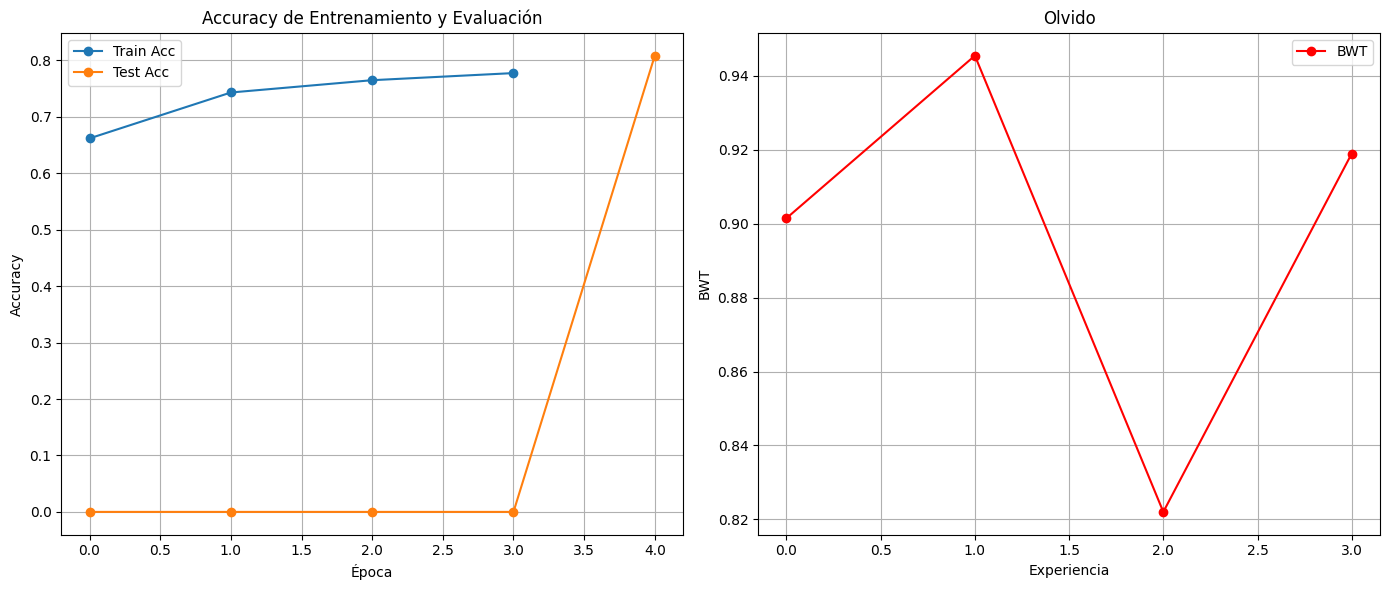

In [ ]:
epochs = [0, 1, 2, 3]
experiences = [0, 1, 2, 3, 4]

train_accuracies = [
    0.6619,
    0.7432,
    0.7650,
    0.7776
]

eval_accuracies = [
    0,
    0,
    0,
    0,
    0.8085
]

# Olvido
forgetting = [
    0.9015,
    0.9455,
    0.8220,
    0.9190,
]

#Accuracy de entrenamiento y evaluación
plt.figure(figsize=(14, 6))

#Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Acc', marker='o')
plt.plot(experiences, eval_accuracies, label='Test Acc', marker='o')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy de Entrenamiento y Evaluación')
plt.legend()
plt.grid()

#Olvido
plt.subplot(1, 2, 2)
plt.plot(experiences[:-1], forgetting, label='BWT', marker='o', color='red')
plt.xlabel('Experiencia')
plt.ylabel('BWT')
plt.title('Olvido')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
"""transform = transforms.Compose([
    transforms.ToTensor(),  #Convierte PIL Image o numpy.ndarray a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  #Normalización
])

cifar_train = CIFAR10('.', train=True, download=True, transform=transform)
cifar_test = CIFAR10('.', train=False, download=True, transform=transform)

benchmark = ni_benchmark(
    train_dataset=cifar_train,
    test_dataset=cifar_test,
    n_experiences=5,
    task_labels=False,
    seed=42
)

train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        self.fc = nn.Linear(64 * 8 * 8, num_classes)

    def forward(self, x):
        x = self.cnn(x)
        return self.fc(x)

model = SimpleCNN(num_classes=benchmark.n_classes)

optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
EntropiaCruzada = nn.CrossEntropyLoss()

interactive_logger = InteractiveLogger()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

cl_strategy = LwF(
    model=model,
    optimizer=optimizer,
    criterion=EntropiaCruzada,
    alpha=0.5,  #Lambda en la memoria
    temperature=2.0,
    train_mb_size=32,
    train_epochs=4,
    eval_mb_size=32,
    plugins=[evaluation_plugin]
)

for experience in train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    cl_strategy.train(experience)
    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(test_stream)
    print(f"Evaluación de la experiencia {experience.current_experience} completada")"""

100%|██████████| 170498071/170498071 [00:03<00:00, 46666313.05it/s] 


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified
Entrenando en la experiencia 0
-- >> Start of training phase << --
-- >> Start of training phase << --
100%|██████████| 313/313 [00:23<00:00, 13.45it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.3102
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.3750
100%|██████████| 313/313 [00:23<00:00, 13.45it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 1.9427
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.3102
100%|██████████| 313/313 [00:24<00:00, 12.88it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.4335
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.5000
100%|██████████| 313/313 [00:24<00:00, 12.88it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 1.5979
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.4335
100%|██████████| 313/313 [00:22<00:00, 13.86it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Ta